<a href="https://colab.research.google.com/github/lixx21/Image_Recognition_Neural_Network/blob/main/Mask_Detection_IMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Felix Pratamasan

First thing that you need to do is download the file on :

[Mask Recognize Zip](https://drive.google.com/file/d/1y9jaIWJohDBQH232cicoVEHkqbtK0mGI/view?usp=sharing)



After downloaded the zip file, you need to import it to google colab. then you can run the program.

In [ ]:
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator as img
from keras.callbacks import EarlyStopping
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#ekstract file
local_zip = '/content/maskrecognize.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

dir = os.path.join('/content/maskrecognize')
os.listdir('/content/maskrecognize')

['with_mask', 'without_mask']

In [ ]:
#generate image

datagenerator = img(rescale= 1./255,
                    rotation_range = 20,
                    width_shift_range =0.3, 
                    height_shift_range =0.3,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4)


train_generator = datagenerator.flow_from_directory(dir, 
                                           target_size = (150, 150),
                                           batch_size = 20,
                                           shuffle = True,
                                           subset = 'training',
                                           class_mode = 'binary'
                                           )

validation_generator = datagenerator.flow_from_directory(dir,
                                                 target_size = (150, 150),
                                                 batch_size = 20,
                                                 shuffle = True,
                                                 subset = 'validation',
                                                 class_mode = 'binary'
                                                 )

Found 2300 images belonging to 2 classes.
Found 1533 images belonging to 2 classes.


In [ ]:
#make a model

callback = EarlyStopping(monitor = 'val_loss',
                        patience = 3,
                        verbose = 1) 


model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(3,3), activation ='relu', input_shape=(150,150,3)), #32 = jumlah filer, (3,3) = kernel 
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),


      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Dense(160, activation = 'relu'),

      tf.keras.layers.Dense(1, activation='sigmoid'),



])

In [ ]:
# Compile model
model.compile(optimizer= tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Train model

model.fit(train_generator,
          steps_per_epoch = 50, 
          epochs = 20, 
          
          validation_data= validation_generator, 
          validation_steps=10, 
          verbose = 2,
          callbacks =[callback])

Epoch 1/20
50/50 - 41s - loss: 0.6409 - accuracy: 0.7200 - val_loss: 0.4629 - val_accuracy: 0.8000
Epoch 2/20
50/50 - 40s - loss: 0.4237 - accuracy: 0.8120 - val_loss: 0.4834 - val_accuracy: 0.8000
Epoch 3/20
50/50 - 39s - loss: 0.3907 - accuracy: 0.8320 - val_loss: 0.4570 - val_accuracy: 0.8000
Epoch 4/20


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50/50 - 39s - loss: 0.3310 - accuracy: 0.8680 - val_loss: 0.4439 - val_accuracy: 0.8150
Epoch 5/20
50/50 - 38s - loss: 0.3263 - accuracy: 0.8710 - val_loss: 0.3782 - val_accuracy: 0.8250
Epoch 6/20
50/50 - 39s - loss: 0.3145 - accuracy: 0.8790 - val_loss: 0.5841 - val_accuracy: 0.7150
Epoch 7/20
50/50 - 39s - loss: 0.2936 - accuracy: 0.8810 - val_loss: 0.4093 - val_accuracy: 0.8300
Epoch 8/20
50/50 - 39s - loss: 0.3279 - accuracy: 0.8640 - val_loss: 0.4599 - val_accuracy: 0.7950
Epoch 00008: early stopping


Saving download.jfif to download (1).jfif
download.jfif
predict : mask


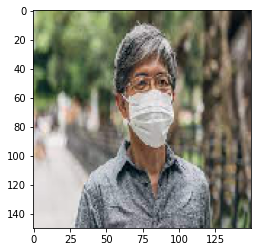

In [ ]:
#upload image
uploaded = files.upload()

for fn in uploaded.keys():

  #predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes == 0:
    print('predict : mask')
  else :
      print('predict : without mask')